# Telco Customer Churn - Exploratory Data Analysis (EDA)

This notebook provides a structured and essential exploratory data analysis (EDA) of the **Telco Customer Churn** dataset. The analysis aims to understand the underlying factors that contribute to customer churn and uncover actionable business insights that can support customer retention strategies.

## Objectives

- Load and inspect the dataset
- Perform basic data cleaning and preprocessing
- Explore numerical and categorical variables
- Examine churn distribution and key influencing factors
- Analyze correlation between variables and churn
- Derive clear and interpretable insights from the data

## Dataset Description

The dataset contains information about a telecom company's customers, including:

- **Demographics**: Gender, age group (SeniorCitizen), partner and dependents status
- **Account information**: Tenure, contract type, billing method, monthly and total charges
- **Service details**: Internet service, online security, tech support, streaming services
- **Target variable**: `Churn` — whether a customer left the service (`Yes`) or stayed (`No`)

The goal of this analysis is to help stakeholders understand patterns in customer behavior and to highlight segments at higher risk of churn.


### Importing Libraries and Setting Configurations

The following libraries are imported to support data manipulation, analysis, and visualization:

- `pandas`: For data loading, manipulation, and analysis using DataFrames.
- `numpy`: For numerical operations and handling of arrays.
- `matplotlib.pyplot`: For basic plotting and visualization.
- `seaborn`: Built on top of matplotlib, it provides a higher-level interface for attractive statistical graphics.
- `warnings`: Used to suppress warning messages for a cleaner output during analysis.

#### Warning Suppression
```python
warnings.filterwarnings('ignore')
```

#### Plot style Configuration
```python
plt.style.use('default')
```

#### Sets the default plotting style of `matplotlib`.
```python
sns.set_palette("Set2")
```




In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

plt.style.use('default')
sns.set_palette("Set2")

### Loading the Dataset

This function is responsible for loading the dataset from a CSV file and displaying basic information to help understand the structure of the data.

```python
def load_data(filepath):

In [3]:
# Load the dataset
def load_data(filepath):
    df = pd.read_csv(filepath)
    print("Dataset loaded successfully!")
    print(f"Shape: {df.shape[0]} rows, {df.shape[1]} columns")
    print("\nFirst 5 rows:")
    print(df.head())
    return df

### Basic Data Information

This function provides a quick overview of the dataset's structure and quality. It checks the column data types, identifies missing values, and detects duplicate rows — all of which are essential for effective data cleaning and preprocessing.

```python
def basic_info(df):

In [4]:
# Basic data information
def basic_info(df):
    print("\n" + "="*50)
    print("BASIC DATA INFORMATION")
    print("="*50)

    print("\nColumn types:")
    print(df.dtypes)

    print("\nMissing values:")
    missing = df.isnull().sum()
    if missing.sum() > 0:
        print(missing[missing > 0])
    else:
        print("No missing values found")

    print(f"\nDuplicate rows: {df.duplicated().sum()}")

### Data Cleaning

The `clean_data()` function performs necessary data cleaning steps to ensure the dataset is ready for analysis and modeling. These steps include data type conversion, handling missing values, and encoding categorical target variables.

```python
def clean_data(df):

In [5]:
# Clean the data
def clean_data(df):
    print("\n" + "="*50)
    print("DATA CLEANING")
    print("="*50)

    df_clean = df.copy()

    df_clean['TotalCharges'] = pd.to_numeric(df_clean['TotalCharges'], errors='coerce')

    missing_total = df_clean['TotalCharges'].isnull().sum()
    if missing_total > 0:
        print(f"Found {missing_total} missing values in TotalCharges")
        mask = df_clean['TotalCharges'].isnull()
        df_clean.loc[mask, 'TotalCharges'] = (
            df_clean.loc[mask, 'tenure'] * df_clean.loc[mask, 'MonthlyCharges']
        )
        print("Missing values filled with calculated values")

    df_clean['Churn_Numeric'] = df_clean['Churn'].map({'Yes': 1, 'No': 0})

    print("Data cleaning completed!")
    return df_clean

### Analysis of Numerical Variables

The `analyze_numerical()` function provides an in-depth overview of key numerical columns in the dataset. It helps visualize the distribution of numeric features and understand how they differ between churned and non-churned customers.

```python
def analyze_numerical(df):

In [6]:
# Analyze numerical variables
def analyze_numerical(df):
    print("\n" + "="*50)
    print("NUMERICAL VARIABLES ANALYSIS")
    print("="*50)

    numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

    print("Basic Statistics:")
    print(df[numerical_cols].describe().round(2))

    fig, axes = plt.subplots(2, 3, figsize=(15, 10))
    fig.suptitle('Numerical Variables Analysis', fontsize=16)

    for i, col in enumerate(numerical_cols):
        axes[0, i].hist(df[col], bins=30, alpha=0.7)
        axes[0, i].set_title(f'{col} Distribution')
        axes[0, i].set_xlabel(col)
        axes[0, i].set_ylabel('Count')

        churn_yes = df[df['Churn'] == 'Yes'][col]
        churn_no = df[df['Churn'] == 'No'][col]

        axes[1, i].boxplot([churn_no, churn_yes], labels=['No Churn', 'Churn'])
        axes[1, i].set_title(f'{col} by Churn Status')
        axes[1, i].set_ylabel(col)

    plt.tight_layout()
    plt.show()

    print("\nComparison by Churn Status:")
    for col in numerical_cols:
        mean_no_churn = df[df['Churn'] == 'No'][col].mean()
        mean_churn = df[df['Churn'] == 'Yes'][col].mean()
        print(f"{col}: No Churn = {mean_no_churn:.2f}, Churn = {mean_churn:.2f}")

### Target Variable Analysis - Churn

The `analyze_target()` function focuses on analyzing the **target variable** of this dataset: `Churn`. This step provides insights into the distribution of customers who have churned versus those who have stayed.

```python
def analyze_target(df):

In [7]:
# Analyze target variable (Churn)
def analyze_target(df):
    print("\n" + "="*50)
    print("TARGET VARIABLE ANALYSIS")
    print("="*50)

    churn_counts = df['Churn'].value_counts()
    churn_pct = df['Churn'].value_counts(normalize=True) * 100

    print("Churn Distribution:")
    for status in churn_counts.index:
        print(f"{status}: {churn_counts[status]} customers ({churn_pct[status]:.1f}%)")

    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    churn_counts.plot(kind='bar', ax=axes[0], color=['lightblue', 'lightcoral'])
    axes[0].set_title('Customer Churn Count')
    axes[0].set_xlabel('Churn Status')
    axes[0].set_ylabel('Number of Customers')
    axes[0].tick_params(axis='x', rotation=0)

    axes[1].pie(churn_counts.values, labels=churn_counts.index, autopct='%1.1f%%', 
               colors=['lightblue', 'lightcoral'])
    axes[1].set_title('Churn Percentage')

    plt.tight_layout()
    plt.show()

### Categorical Variable Analysis

The `analyze_categorical()` function explores the relationship between key categorical variables and the target variable, `Churn`. This step helps identify categories that are associated with high or low churn rates.

```python
def analyze_categorical(df):

In [8]:
# Analyze categorical variables
def analyze_categorical(df):
    print("\n" + "="*50)
    print("CATEGORICAL VARIABLES VS CHURN")
    print("="*50)

    important_cats = ['Contract', 'PaymentMethod', 'InternetService', 'gender', 
                     'SeniorCitizen', 'Partner', 'Dependents']

    print("Churn Rates by Category:")
    churn_rates = {}
    for col in important_cats:
        rates = df.groupby(col)['Churn_Numeric'].mean() * 100
        churn_rates[col] = rates
        print(f"\n{col}:")
        for category, rate in rates.items():
            print(f"  {category}: {rate:.1f}%")

    fig, axes = plt.subplots(2, 4, figsize=(16, 10))
    fig.suptitle('Churn Rates by Categorical Variables', fontsize=16)

    for i, col in enumerate(important_cats):
        row = i // 4
        col_idx = i % 4

        rates = churn_rates[col]
        bars = axes[row, col_idx].bar(range(len(rates)), rates.values)
        axes[row, col_idx].set_title(f'{col}')
        axes[row, col_idx].set_ylabel('Churn Rate (%)')
        axes[row, col_idx].set_xticks(range(len(rates)))
        axes[row, col_idx].set_xticklabels(rates.index, rotation=45, ha='right')

        for j, (bar, rate) in enumerate(zip(bars, rates.values)):
            if rate > 40:
                bar.set_color('red')
            elif rate > 25:
                bar.set_color('orange')
            else:
                bar.set_color('lightblue')

    fig.delaxes(axes[1, 3])

    plt.tight_layout()
    plt.show()

### Correlation Analysis

The `correlation_analysis()` function evaluates the relationship between input features and the target variable (`Churn_Numeric`) using Pearson correlation. This helps identify the most influential variables contributing to customer churn.

```python
def correlation_analysis(df):


In [9]:
def correlation_analysis(df):
    print("\n" + "="*50)
    print("CORRELATION ANALYSIS")
    print("="*50)

    # Sample if too large
    if df.shape[0] > 5000:
        df = df.sample(5000, random_state=42)

    # Limit to low-cardinality object columns
    low_cardinality = [col for col in df.select_dtypes(include='object')
                       if df[col].nunique() <= 10]
    df_encoded = pd.get_dummies(df[low_cardinality], drop_first=True)

    df_numeric = df.select_dtypes(include=[np.number])
    df_for_corr = pd.concat([df_numeric, df_encoded], axis=1)

    if 'Churn_Numeric' not in df_for_corr.columns:
        print("Column 'Churn_Numeric' not found.")
        return

    corr_with_churn = df_for_corr.corr()['Churn_Numeric'].abs().sort_values(ascending=False)

    print("Top 10 features correlated with Churn:")
    print(corr_with_churn.head(11)[1:].round(3))

    top_features = corr_with_churn.head(11).index

    plt.figure(figsize=(10, 8))
    sns.heatmap(df_for_corr[top_features].corr(), 
                annot=True, cmap='coolwarm', center=0, fmt='.2f')
    plt.title('Correlation Matrix - Top Features')
    plt.tight_layout()
    plt.show()


### Key Insights and Recommendations

The `generate_insights()` function summarizes important findings from the data and provides actionable recommendations to help reduce customer churn. It identifies key patterns based on churn rates across customer segments.

```python
def generate_insights(df):


In [10]:
# Key insights
def generate_insights(df):
    print("\n" + "="*50)
    print("KEY INSIGHTS")
    print("="*50)

    total_customers = len(df)
    churned_customers = df['Churn_Numeric'].sum()
    churn_rate = (churned_customers / total_customers) * 100

    print(f"Overall churn rate: {churn_rate:.1f}%")
    print(f"Total customers lost: {churned_customers}")

    print("\nHigh-risk customer segments:")

    contract_churn = df.groupby('Contract')['Churn_Numeric'].mean() * 100
    highest_churn_contract = contract_churn.idxmax()
    print(f"- {highest_churn_contract} contracts: {contract_churn[highest_churn_contract]:.1f}% churn rate")

    payment_churn = df.groupby('PaymentMethod')['Churn_Numeric'].mean() * 100
    highest_churn_payment = payment_churn.idxmax()
    print(f"- {highest_churn_payment}: {payment_churn[highest_churn_payment]:.1f}% churn rate")

    avg_tenure_churned = df[df['Churn'] == 'Yes']['tenure'].mean()
    avg_tenure_retained = df[df['Churn'] == 'No']['tenure'].mean()
    print(f"- Average tenure of churned customers: {avg_tenure_churned:.1f} months")
    print(f"- Average tenure of retained customers: {avg_tenure_retained:.1f} months")

    print("\nRecommendations:")
    print("1. Focus on retaining month-to-month contract customers")
    print("2. Encourage automatic payment methods")
    print("3. Implement early intervention for new customers (first 12 months)")
    print("4. Create loyalty programs for long-term retention")

### Main Function — Running the Full EDA Pipeline

The `run_eda()` function serves as the central controller for the entire exploratory data analysis (EDA) workflow. It executes each step in a logical and organized sequence, producing insights about customer churn from raw data to actionable results.

```python
def run_eda(filepath):


In [11]:
# Main function
def run_eda(filepath):
    print("Starting Telco Customer Churn EDA Analysis")
    print("="*60)

    df = load_data(filepath)
    basic_info(df)
    df_clean = clean_data(df)
    analyze_target(df_clean)
    analyze_numerical(df_clean)
    analyze_categorical(df_clean)
    correlation_analysis(df_clean)
    generate_insights(df_clean)

    print("\nAnalysis completed successfully!")
    return df_clean

Starting Telco Customer Churn EDA Analysis
Dataset loaded successfully!
Shape: 7043 rows, 21 columns

First 5 rows:
   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No    

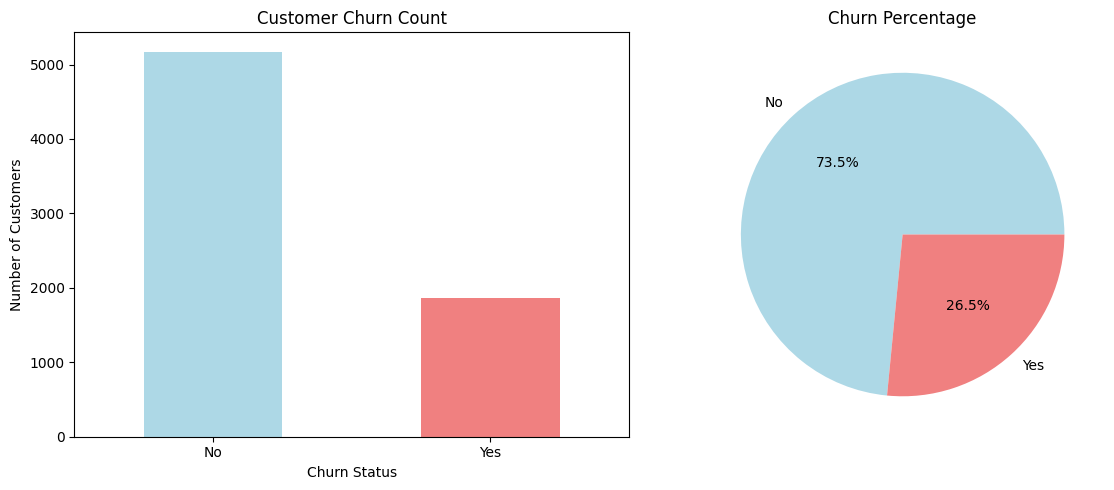


NUMERICAL VARIABLES ANALYSIS
Basic Statistics:
        tenure  MonthlyCharges  TotalCharges
count  7043.00         7043.00       7043.00
mean     32.37           64.76       2279.73
std      24.56           30.09       2266.79
min       0.00           18.25          0.00
25%       9.00           35.50        398.55
50%      29.00           70.35       1394.55
75%      55.00           89.85       3786.60
max      72.00          118.75       8684.80


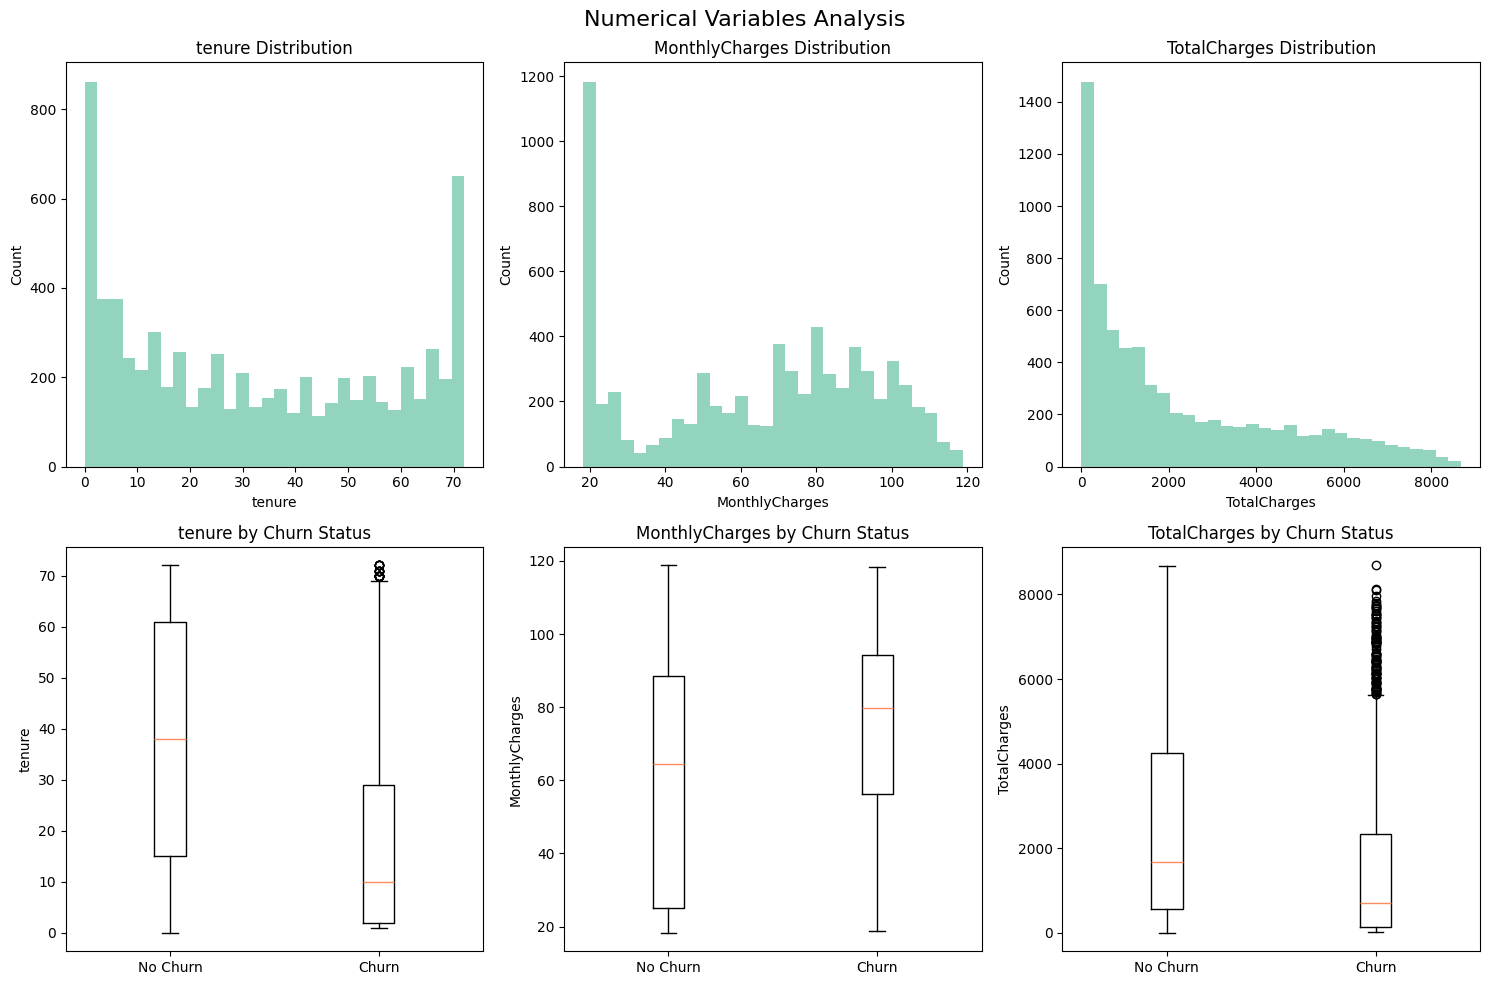


Comparison by Churn Status:
tenure: No Churn = 37.57, Churn = 17.98
MonthlyCharges: No Churn = 61.27, Churn = 74.44
TotalCharges: No Churn = 2549.91, Churn = 1531.80

CATEGORICAL VARIABLES VS CHURN
Churn Rates by Category:

Contract:
  Month-to-month: 42.7%
  One year: 11.3%
  Two year: 2.8%

PaymentMethod:
  Bank transfer (automatic): 16.7%
  Credit card (automatic): 15.2%
  Electronic check: 45.3%
  Mailed check: 19.1%

InternetService:
  DSL: 19.0%
  Fiber optic: 41.9%
  No: 7.4%

gender:
  Female: 26.9%
  Male: 26.2%

SeniorCitizen:
  0: 23.6%
  1: 41.7%

Partner:
  No: 33.0%
  Yes: 19.7%

Dependents:
  No: 31.3%
  Yes: 15.5%


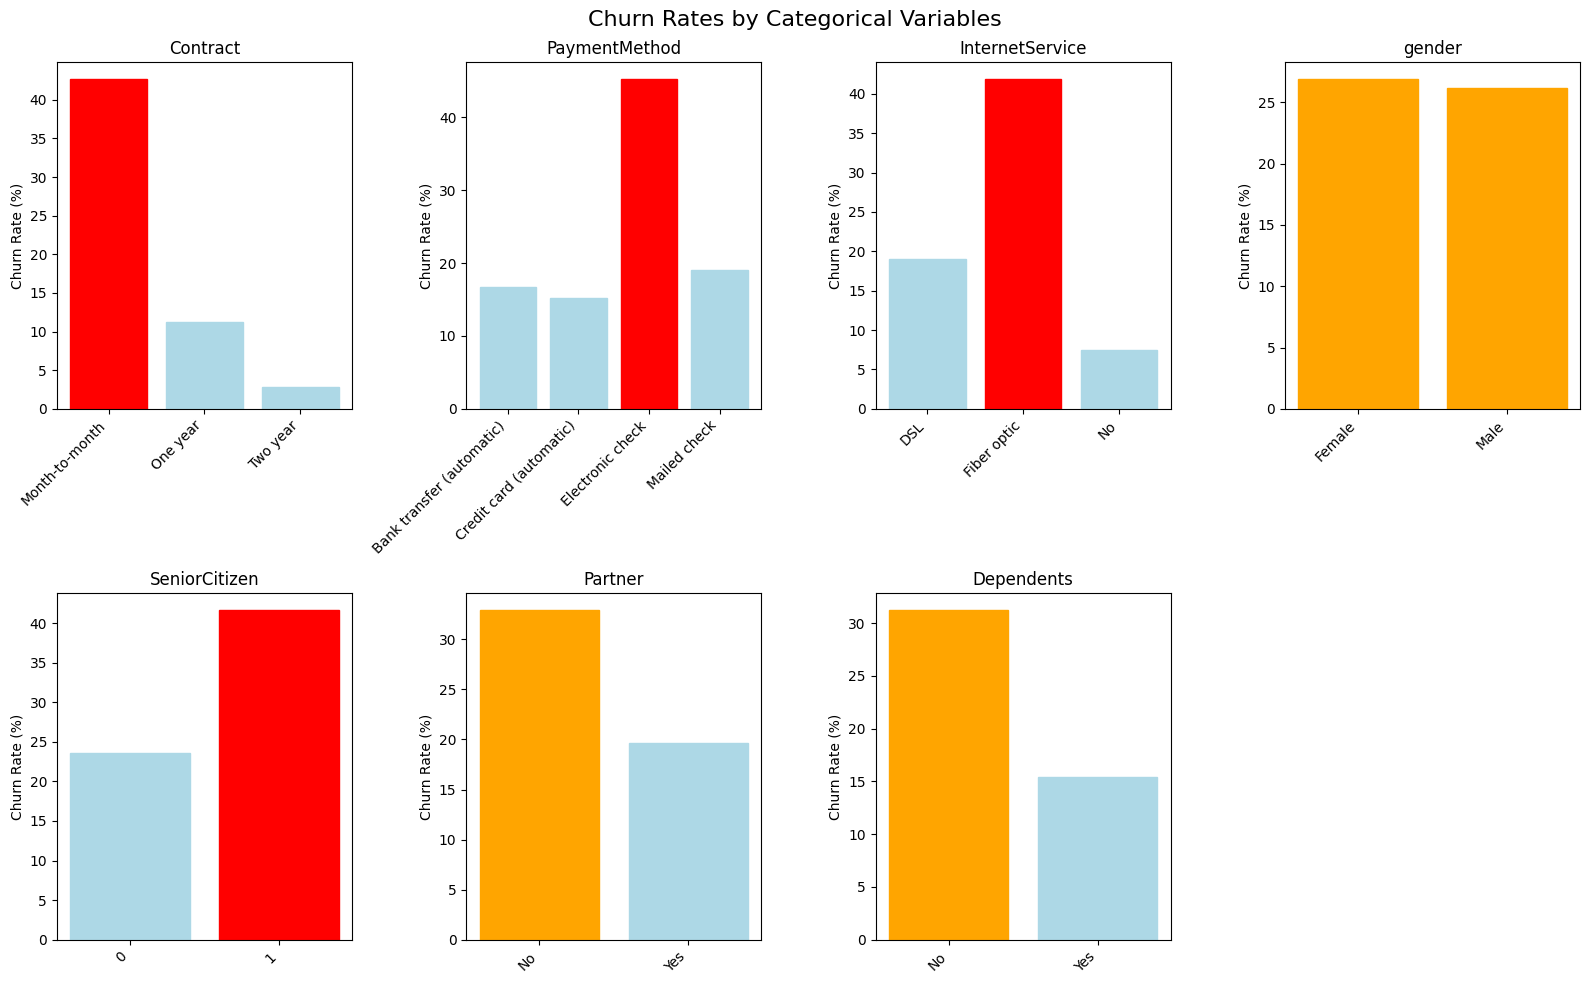


CORRELATION ANALYSIS
Top 10 features correlated with Churn:
Churn_Yes                               1.000
tenure                                  0.355
PaymentMethod_Electronic check          0.325
InternetService_Fiber optic             0.314
Contract_Two year                       0.305
InternetService_No                      0.235
OnlineBackup_No internet service        0.235
DeviceProtection_No internet service    0.235
StreamingTV_No internet service         0.235
TechSupport_No internet service         0.235
Name: Churn_Numeric, dtype: float64


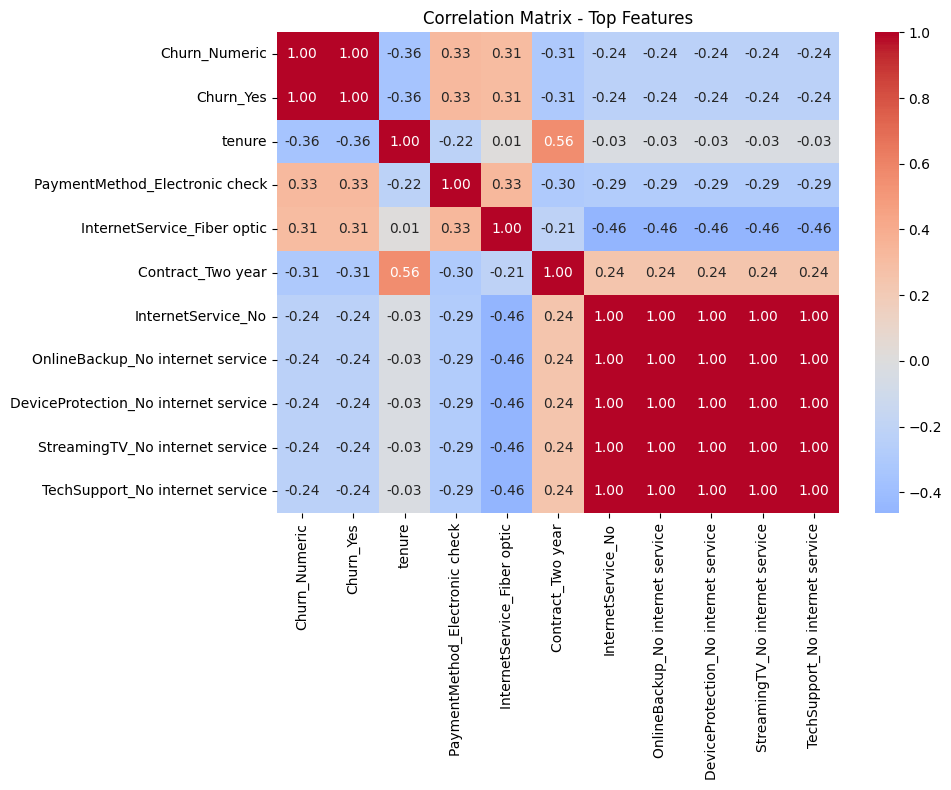


KEY INSIGHTS
Overall churn rate: 26.5%
Total customers lost: 1869

High-risk customer segments:
- Month-to-month contracts: 42.7% churn rate
- Electronic check: 45.3% churn rate
- Average tenure of churned customers: 18.0 months
- Average tenure of retained customers: 37.6 months

Recommendations:
1. Focus on retaining month-to-month contract customers
2. Encourage automatic payment methods
3. Implement early intervention for new customers (first 12 months)
4. Create loyalty programs for long-term retention

Analysis completed successfully!


In [12]:
# Run EDA on your CSV
file_path = 'C:/Users/LENOVO/Documents/pymodel/customer-churn-prediction/data/raw/WA_Fn-UseC_-Telco-Customer-Churn.csv'  #path to your dataset location
cleaned_data = run_eda(file_path)